Problem 1

(a)

In [13]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.interpolate import LSQUnivariateSpline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_w = pd.read_csv('data/strongdrink.txt')
X = df_w[['alco', 'malic', 'tot_phen', 'color_int']]
y = df_w['cultivar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
logit = LogisticRegression(random_state = 20, solver = 'lbfgs', 
                           multi_class = 'multinomial').fit(X_train, y_train)

In [3]:
j1 = [logit.intercept_[0]] + logit.coef_[0].tolist()
j2 = [logit.intercept_[1]] + logit.coef_[1].tolist()
results = pd.DataFrame(data = {'j = 1':j1, 'j = 2':j2}, 
                       index = ['intercept', 'b1', 'b2', 'b3', 'b4'])
results

j = 1      j = 2
intercept -24.027615  22.780731
b1          1.701734  -1.466297
b2         -0.265787  -0.332951
b3          1.224101   0.663556
b4          0.022507  -0.922682

In [4]:
y_pred = logit.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44



The error rates for category 1, 2, and 3 are 0.13, 0.0, and 0.0

The 3rd category is the model best at predicting, because it has the highest f1-score. 

The most accurately predicted category is not the one with the most observations. The 2nd category is the one with the most observations.

In [6]:
MSE = ((y_test - y_pred) ** 2).sum() / y_pred.shape[0]
print('MSE = ', MSE)

MSE =  0.045454545454545456


(b)

In [8]:
Xvars = X.values
yvars = y.values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
yt = np.zeros(N_loo)
yp = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression(random_state = 20, solver = 'lbfgs', 
                                multi_class = 'multinomial')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    yt[test_index] = y_test
    yp[test_index] = y_pred
    if y_test == y_pred:
        MSE_vec[test_index] = 0
    else:
        MSE_vec[test_index] = 1

MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('Test estimate MSE LOOCV =', MSE_loo)
print('Test estimate MSE standard error =', MSE_loo_std)

Test estimate MSE LOOCV = 0.07954545454545454
Test estimate MSE standard error = 0.2705882022679695


In [9]:
print(classification_report(yt, yp))

             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176



The error rate for the 1st category decreases, while that for the 2nd and 3rd category increases.

(c)

In [11]:
k = 4
kf = KFold(n_splits = k, random_state = 20, shuffle = True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)
yt = np.zeros(N_loo)
yp = np.zeros(N_loo)
k_ind = int(0)

for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression(random_state = 20, solver = 'lbfgs', 
                                multi_class = 'multinomial')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    yt[test_index] = y_test
    yp[test_index] = y_pred
    
    mse = []
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            mse.append(0)
        else:
            mse.append(1)
    MSE_vec_kf[k_ind] = np.array(mse).mean()
    k_ind += 1
    
MSE_vec_kf = np.array(MSE_vec_kf)
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('Test estimate MSE k-fold =', MSE_kf)
print('Test estimate MSE standard error =', MSE_kf_std)

Test estimate MSE k-fold = 0.08522727272727273
Test estimate MSE standard error = 0.02476647127011746


In [12]:
print(classification_report(yt, yp))

             precision    recall  f1-score   support

        1.0       0.90      0.92      0.91        59
        2.0       0.90      0.90      0.90        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.91      0.91       176



The error rate of the 1st category is the same as that of part(b) and lower than that of part(a).
The error rate of the 2nd category is higher than both part(a) and part(b).
The error rate of the 3rd category is the same as that of part(b) and higher than that of part(a).

Problem 2

(a)

In [14]:
df_c = pd.read_csv('data/CoolIndex.txt', names = ['age', 'coolness'])

Text(0.5,1,'Coolness Index Change with Age')

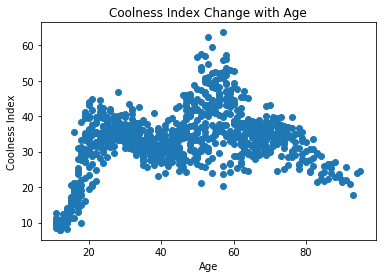

In [16]:
plt.scatter(df_c['age'], df_c['coolness'])
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness Index Change with Age')

(b)

In [20]:
df_c["bin1"]=np.where((df_c.age>=11) & (df_c.age<22),1,0)
df_c["bin2"]=np.where((df_c.age>=22) & (df_c.age<40),1,0)
df_c["bin3"]=np.where((df_c.age>=40) & (df_c.age<59),1,0)
df_c["bin4"]=np.where((df_c.age>=59) & (df_c.age<77),1,0)
df_c["bin5"]=np.where((df_c.age>=77) & (df_c.age<=95),1,0)

In [21]:
x = df_c[['bin1', 'bin2', 'bin3', 'bin4', 'bin5']]
y = df_c['coolness']
reg = sm.OLS(y, x).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               coolness   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 27 Feb 2019   Prob (F-statistic):          3.73e-114
Time:                        11:28:49   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bin1          20.1025      0.562     35.746      0.0

 beta1 = 20.10, beta2 = 34.48, beta3 = 37.64, beta4 = 35.23, beta5 = 27.30

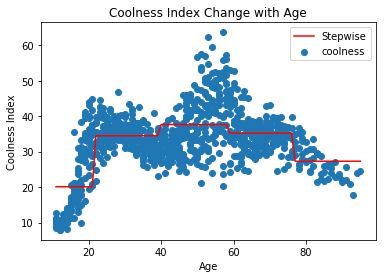

In [22]:
plt.scatter(df_c['age'], df_c['coolness'])
plt.plot(df_c['age'], reg.predict(), color = 'r', label = 'Stepwise')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness Index Change with Age')
plt.show()

In [23]:
reg.predict([0, 0, 0, 1, 0])

array([35.22540004])

The predicted coolness of a 73-year old from the stepwise function is 35.23.

(c)

In [26]:
df_c2 = df_c.groupby('age').mean()
df_c2 = df_c2.reset_index()
lin_spline = LSQUnivariateSpline(np.array(df_c2['age']), np.array(df_c2['coolness']),
                   t = [22, 40, 59, 77], k = 1)

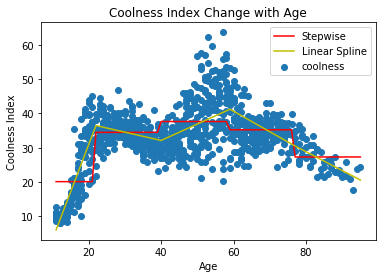

In [27]:
plt.scatter(df_c['age'], df_c['coolness'])
plt.plot(df_c['age'], reg.predict(), color = 'r', label = 'Stepwise')
plt.plot(df_c2['age'], lin_spline(df_c2['age']), color = 'y', label = 'Linear Spline')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness Index Change with Age')
plt.show()

In [28]:
lin_spline(73)

array(32.86784862)

The predicted coolness of a 73-year old from the linear spline is 32.87.

(d)

In [30]:
cubic_spline = LSQUnivariateSpline(np.array(df_c2['age']), np.array(df_c2['coolness']),
                   t = [22, 40, 59, 77], k = 3)

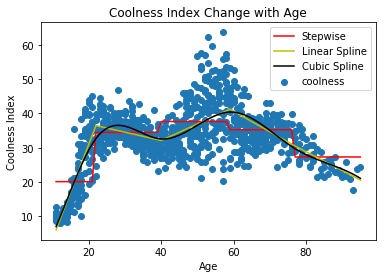

In [31]:
plt.scatter(df_c['age'], df_c['coolness'])
plt.plot(df_c['age'], reg.predict(), color = 'r', label = 'Stepwise')
plt.plot(df_c2['age'], lin_spline(df_c2['age']), color = 'y', label = 'Linear Spline')
plt.plot(df_c2['age'], cubic_spline(df_c2['age']), color = 'k', label = 'Cubic Spline')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness Index Change with Age')
plt.show()

In [32]:
cubic_spline(73)

array(32.64230107)

The predicted coolness of a 73-year old from the cubic spline is 32.64.